## Airbnb Data Analysis

Airbnb has become a popular platform for connecting travelers with housing rentals across the world. Its users can search its extensive database of rentals, in the hopes of finding a suitable match for their travels. This notebook explores a dataset of Airbnb rentals in Asheville, North Carolina. The data contains the following relevant information about the rentals:

* Unique identifiers for the rental (id) and the host (host_id)
* Name for the rental (name) and host (host_name)
* Location information (neighborhood - ZIP code, latitude/longitude)
* Room type
* Average nightly price (in dollars)
* Minimum nights per stay
* Number of reviews for the rental
* Date of most recent review
* Number of reviews per month
* Number of listings by the host in the last month
* Number of available days for rental over the next year (availability_365)

In [1]:
import pandas as pd
df = pd.read_csv('airbnb_asheville_listings.csv')

In [2]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,38585,Charming Victorian twin BR for 2,165529,Evelyne,NaN,28804,35.65146,-82.62792,Private room,45,1,121,2018-11-25,1.20,1,60
1,80905,French Industrial Chic Loft,427027,AshevilleStay,NaN,28801,35.59701,-82.55237,Entire home/apt,765,1,92,2018-12-02,1.01,12,361
2,108061,"Walk downtown or UNCA, Pets OK!",320564,Lisa,NaN,28801,35.60670,-82.55563,Entire home/apt,75,2,85,2018-12-25,0.94,2,9
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.57972,-82.59617,Entire home/apt,107,1,195,2019-02-10,2.12,7,339
4,156805,"Private Room ""Ader"" at BPS Hostel",746673,BonPaul,NaN,28806,35.57755,-82.59697,Private room,71,1,51,2019-01-11,0.56,7,349
5,156926,"Mixed Dorm ""Top Bunk #1"" at BPS Hostel",746673,BonPaul,NaN,28806,35.57776,-82.59500,Shared room,26,1,213,2019-02-05,2.34,7,351
6,160594,Historic Grove Park,769252,Elizabeth,NaN,28801,35.61442,-82.54127,Private room,125,30,58,2015-10-19,0.63,1,365
7,189916,The Very Best Location Downtown,916386,Amy,NaN,28801,35.59055,-82.55447,Private room,127,2,143,2015-08-16,1.58,1,47
8,209068,Terrace Cottage,1029919,Kevin,NaN,28804,35.61856,-82.55276,Entire home/apt,134,30,53,2018-10-31,0.59,1,360
9,213006,Blue Gate Lodging,1098412,Susanne,NaN,28806,35.58345,-82.59713,Private room,58,2,117,2018-12-30,1.43,1,363


In [3]:
# setting index
df.set_index('id', inplace=True)

In [4]:
# removing neighborhood group since it is empty; all values are NaN
df.drop('neighbourhood_group', axis=1, inplace=True)

#### Missing Data:

I have done the following steps for preprocessing:

1. Replaced NaNs in the reviews_per_month column with zero
2. Converted last_review column from string to datetime
3. This converted missing dates to NaT

In [5]:
# checking missing values
df.isna().sum()

name                                0
host_id                             0
host_name                           0
neighbourhood                       0
latitude                            0
longitude                           0
room_type                           0
price                               0
minimum_nights                      0
number_of_reviews                   0
last_review                       199
reviews_per_month                 199
calculated_host_listings_count      0
availability_365                    0
dtype: int64

In [6]:
# if some Airbnbs have blanks for 'Number of reviews per month', they were classified as NaN; zero seemed more appropriate
df['reviews_per_month'].fillna(0, inplace=True)

In [7]:
df.isna().sum()

name                                0
host_id                             0
host_name                           0
neighbourhood                       0
latitude                            0
longitude                           0
room_type                           0
price                               0
minimum_nights                      0
number_of_reviews                   0
last_review                       199
reviews_per_month                   0
calculated_host_listings_count      0
availability_365                    0
dtype: int64

In [8]:
# Also, the last_review column was strin holding date values. Hence converted to date, missing values are now NaT
df['last_review'] = pd.to_datetime(df['last_review'])

In [9]:
df['price'].describe()

count     2053.000000
mean       160.607891
std        411.685034
min         10.000000
25%         75.000000
50%         99.000000
75%        150.000000
max      10000.000000
Name: price, dtype: float64

In [10]:
# %pylab inline
import pandas as pd
import seaborn as sns

#### Analysis of distribution of average nightly price in the data set

C:\Users\prave\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


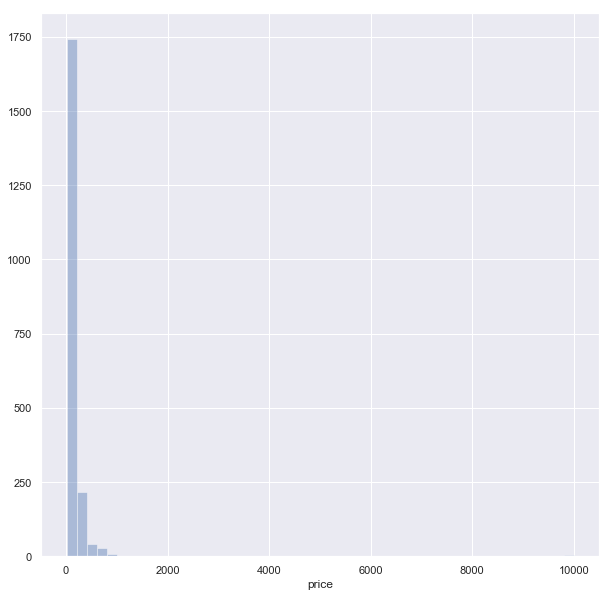

In [11]:
sns.set(rc={'figure.figsize':(10,10)})
distplot1 = sns.distplot(df['price'], kde=False, rug=False)

We see that most of the Airbnbs are priced below 200 per night, and the maximum value is 10000. Minimum is 10.

(0, 1200)

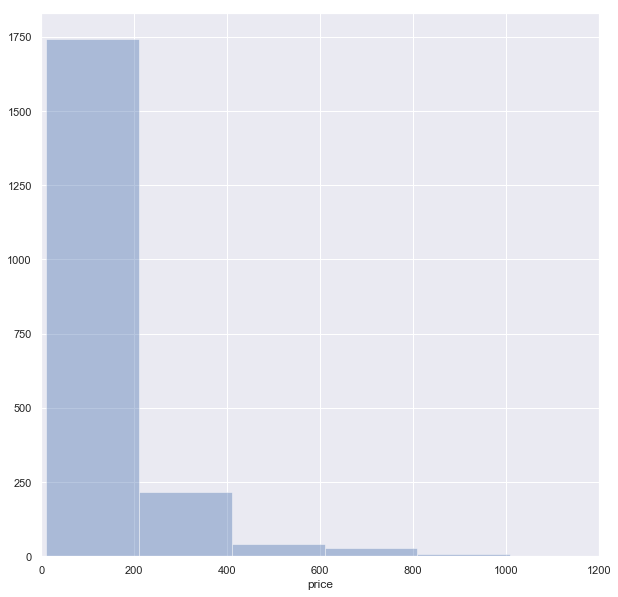

In [12]:
distplot1 = sns.distplot(df['price'], kde=False, rug=False)
distplot1.set_xlim([0, 1200])

#### The room type is one of the most important characteristics of the rental, and has a significant impact on the average nightly price. Hence, I have performed analysis of relationship between the room type and average nightly price

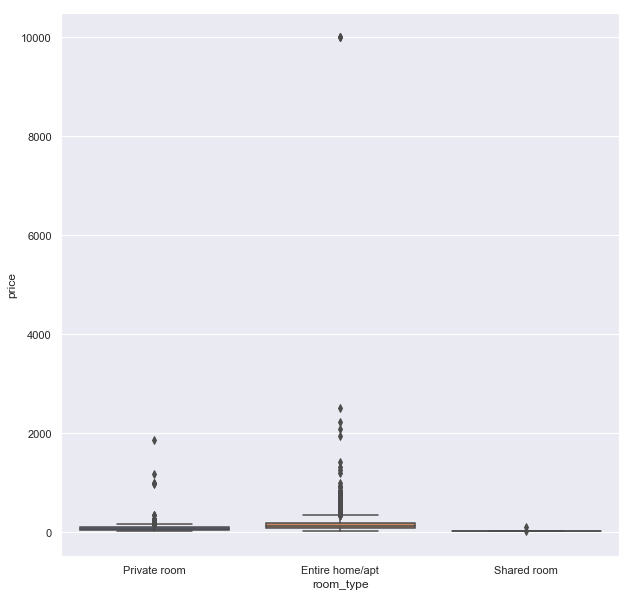

In [13]:
import matplotlib.pyplot as plt
boxplot1 = sns.boxplot(x='room_type', y='price', data=df)
# boxplot1.set_ylim([0, 1000]) 
#plt.plot(df['price'], df['room_type'],'r.', markersize=5, lw=0.5)

(0, 1000)

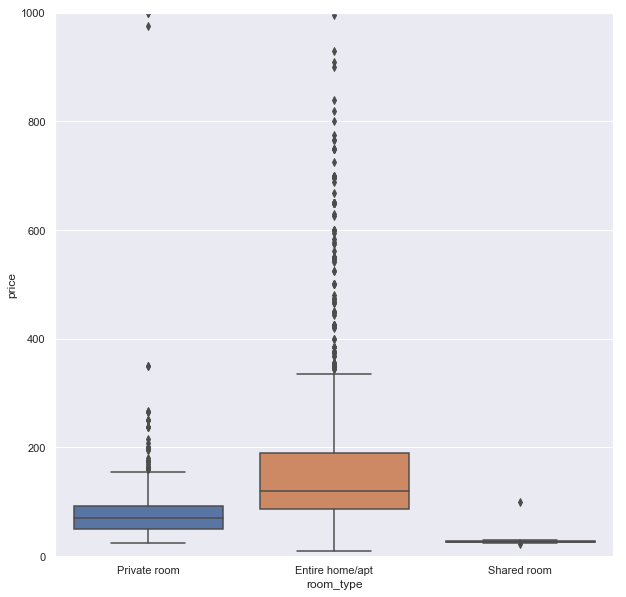

In [14]:
boxplot1 = sns.boxplot(x='room_type', y='price', data=df)
boxplot1.set_ylim([0, 1000]) 

We observe that, on averagem Airbnbs that are Entire home or apartments tend to have higher average nightly price compared to private rooms. Shared rooms are generally the cheapest among all three room types.

#### Aside from the size of the rental, the location is probably the other critical determinant of price. Hence, I have analyzed the distribution of rentals by location and the relationship between the location of the rental and average nightly price

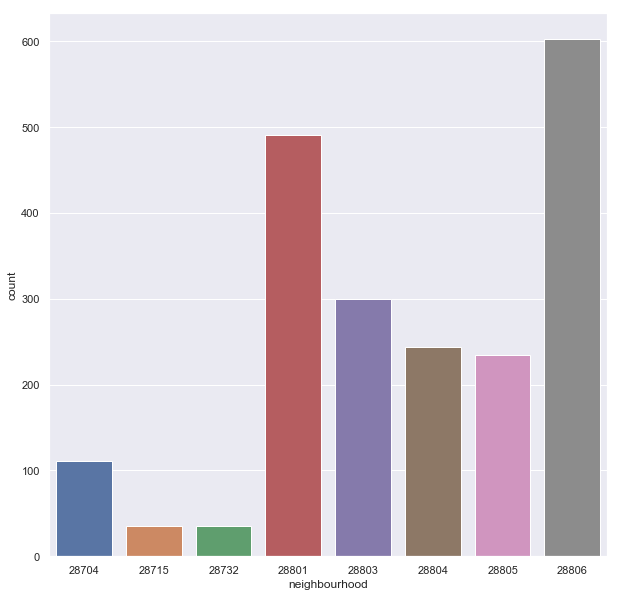

In [15]:
sns.countplot(x='neighbourhood', data=df)

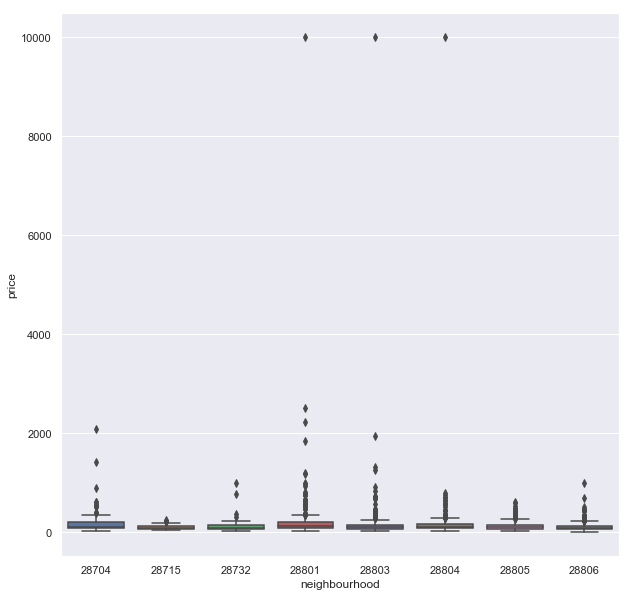

In [16]:
boxplot2 = sns.boxplot(x='neighbourhood', y='price', data=df)
#boxplot2.set_ylim([0, 4000])

(0, 1000)

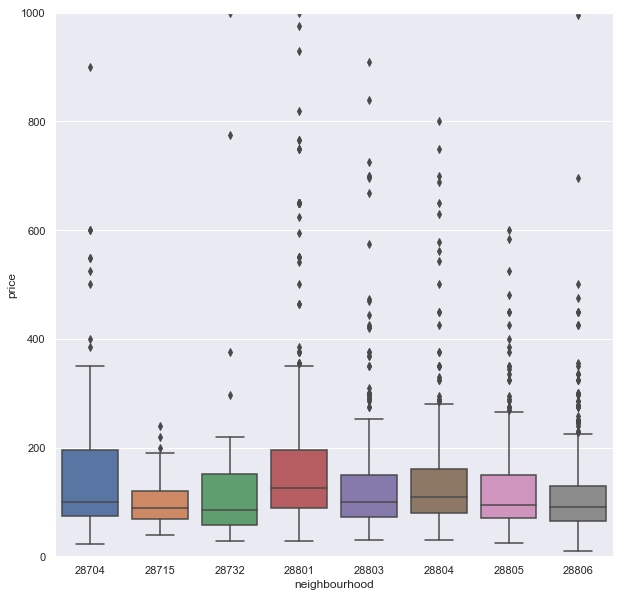

In [17]:
# Plot zoomed in

boxplot2 = sns.boxplot(x='neighbourhood', y='price', data=df)
boxplot2.set_ylim([0, 1000])

The neighbourhood with code 28801 seems to be housing the most expensive Airbnbs on average, while neighbourhood with code 28715 seems to be housing the least expensive Airbnbs on average. 

Zip code 28801 corresponds to Asheville, NC and 28715 corresponds to Candler, NC.
Since Candler is outside Asheville, it seems to be comparitively less expensive

#### Analysis of distribution of the minimum number of nights for each stay. Furthermore, it has been segmented according to room type.

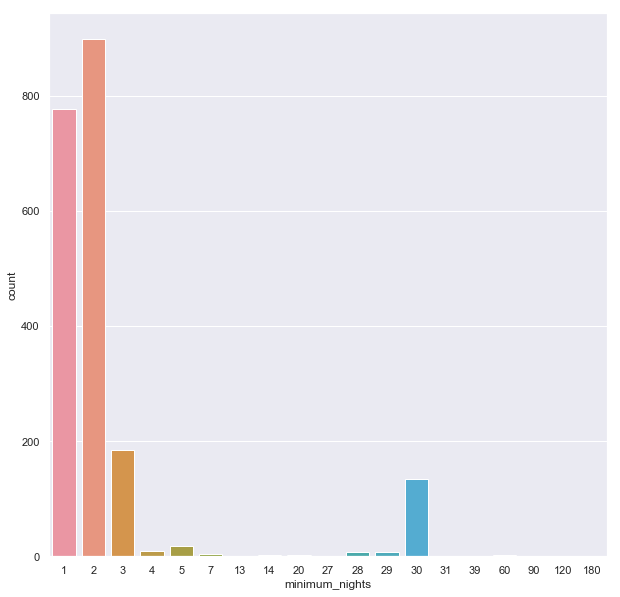

In [19]:
sns.countplot(x='minimum_nights', data=df)

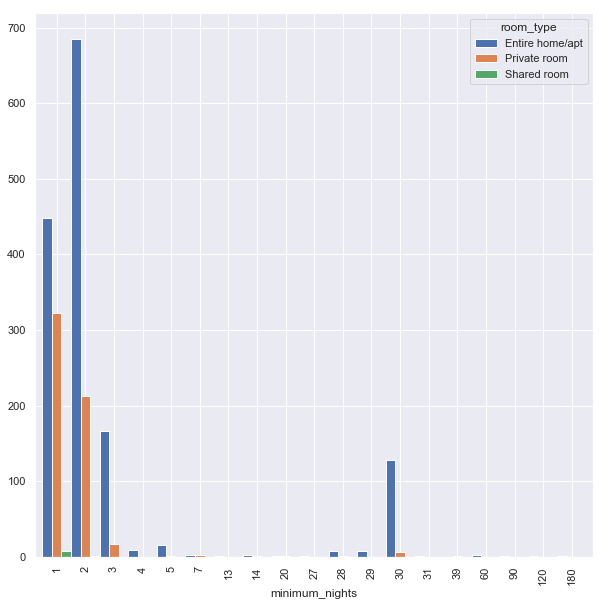

In [20]:
pd.crosstab(index=df.minimum_nights, columns=df.room_type).plot(kind='bar', width=1)

We notice that most Airbnbs that are Entire homes or apartments generally prefer to give the property for a minimum of one or two nights. Private rooms also seem to have similar trends. We also observe a anomaly in the data which is that we see that there are a few Entire room/apartment Airbnbs that have 30 minimum nights of stay. I think these are Airbnbs that are given out on a monthly basis


There are very few shared rooms, and they prefer to have minimum one night stay.

#### Analysis on hosts who have at least 5 listings on Airbnb

I wanted to look at the hosts who owned the most number of Airbnbs and look at what possible strategies they might have chosen to decide the price for the Airbnb.

In [21]:
df_top_listing = df['host_id'].value_counts()
df_top_listing.head(3)

96187307     22
149601167    22
167186184    17
Name: host_id, dtype: int64

In [38]:
# considering the top 3 from this
top_three = df[df.host_id.isin(list(df_top_listing.head(3).index))]

In [40]:
top_three.set_index('host_id',inplace=True)
top_three

,id,name,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
host_id,,,,,,,,,,,,,,
96187307,16937948,Avery's Creek,Steve,28704,35.44121,-82.57294,Entire home/apt,900,1,20,2018-12-16,0.95,22,226
96187307,16937957,Cove Cottage,Steve,28805,35.61030,-82.52244,Entire home/apt,450,1,18,2018-12-30,0.82,22,363
96187307,16937982,The Reed Cottage at Biltmore Village; Perfect ...,Steve,28803,35.56311,-82.53946,Entire home/apt,275,1,4,2018-07-16,0.18,22,47
96187307,16937995,Upstream Cottage,Steve,28806,35.56783,-82.56626,Entire home/apt,500,1,30,2019-01-06,1.30,22,318
96187307,16937997,Asheville Cabin,Steve,28804,35.62512,-82.52979,Entire home/apt,450,1,43,2019-02-03,1.93,22,268
96187307,16938004,Summit Cottage,Steve,28803,35.56154,-82.54096,Entire home/apt,10000,1,4,2018-01-01,0.20,22,0
96187307,17606368,Hidden Cove Cabin,Steve,28805,35.61614,-82.52062,Entire home/apt,600,1,21,2018-12-24,1.18,22,181
96187307,17606369,Downtown Asheville in Biltmore Village; luxuri...,Steve,28803,35.56544,-82.54232,Entire home/apt,350,1,11,2018-09-30,0.53,22,365
96187307,18248623,Deerhaven Hideaway,Steve,28803,35.49579,-82.54170,Entire home/apt,700,1,10,2018-10-14,0.73,22,1


In [55]:
# Analysis of host 1

host1 = top_three[top_three.index==96187307]
host1['room_type'].unique()

array(['Entire home/apt'], dtype=object)

In [54]:
host1['minimum_nights'].unique()

array([1], dtype=int64)

In [68]:
table1 = host1.pivot_table(index = 'neighbourhood' , columns = 'minimum_nights', values = 'price', aggfunc = 'mean', fill_value = 0)
table1

minimum_nights,1
neighbourhood,
28704,650.000000
28801,3583.333333
28803,2831.250000
28804,2465.000000
28805,525.000000
28806,415.833333


In [84]:
new_index = [28801,28803,28804,28704,28805,28806]
table1 = table1.reindex(index = new_index)

In [85]:
table1

minimum_nights,1
neighbourhood,
28801,3583.333333
28803,2831.250000
28804,2465.000000
28704,650.000000
28805,525.000000
28806,415.833333


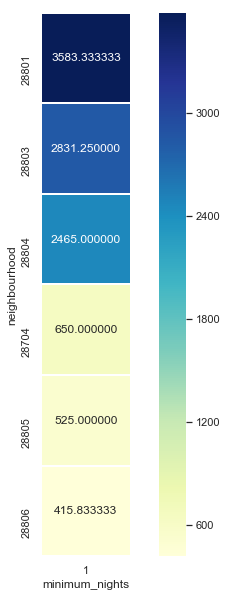

In [86]:
sns.heatmap(table1, annot=True, fmt='f', cmap="YlGnBu", square=True, linewidths=1);

Host 1 had a strict minimum one-night stay policy and decided to price the Airbnb based on the neighborhood in which it was located.

In [63]:
# Analysis of host 2
host2 = top_three[top_three.index==149601167]
host2['room_type'].unique()

array(['Entire home/apt'], dtype=object)

In [64]:
host2['minimum_nights'].unique()

array([30,  2], dtype=int64)

In [87]:
table2 = host2.pivot_table(index = 'neighbourhood' , columns = 'minimum_nights', values = 'price', aggfunc = 'mean', fill_value = 0)
table2

minimum_nights,2,30
neighbourhood,,
28801,184.250000,59
28804,86.000000,0
28805,150.333333,0
28806,110.400000,0


Host 2 had a strict minimum two-night stay policy and decided to price the Airbnb based on the neighborhood in which it was located. However, he/she also owns an Airbnb that is given out for a minimum of 30 nights, which is given out at a cheaper rate.

In [90]:
new_index2 = [28801,28805,28806,28804]
table2 = table2.reindex(index = new_index2)

In [91]:
table2

minimum_nights,2,30
neighbourhood,,
28801,184.250000,59
28805,150.333333,0
28806,110.400000,0
28804,86.000000,0


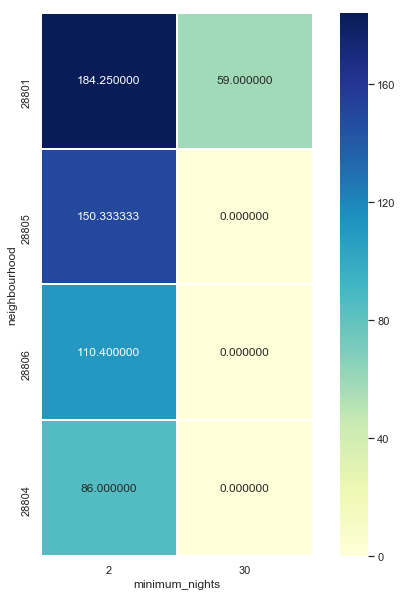

In [92]:
sns.heatmap(table2, annot=True, fmt='f', cmap="YlGnBu", square=True, linewidths=1);

In [93]:
# Analysis of host 3

host3 = top_three[top_three.index==167186184]
host3['room_type'].unique()

array(['Entire home/apt'], dtype=object)

In [94]:
table3 = host3.pivot_table(index = 'neighbourhood' , columns = 'minimum_nights', values = 'price', aggfunc = 'mean', fill_value = 0)
table3

minimum_nights,1
neighbourhood,
28801,646.764706


Host 3 has houses only in one neighbourhood and has an average price of 646.76 per night with a minimum one-night stay policy. 